<a href="https://colab.research.google.com/github/KwonYN/TIL/blob/master/PYTHON/TENSORFLOW2/02_00_01_module_import_ipynb%EC%9D%98_%EC%82%AC%EB%B3%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 실습 2-0-1. Private modeul importing

>### AI 기초반의 `예제_19_MNIST_MLP_BN.ipynb` code를 기반으로 실습

## Mount google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


## Module importing

>### Load modules

In [2]:
%tensorflow_version 1.x

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

print("Module Loaded.")
print("NumPy Version :{}".format(np.__version__))
print("TensorFlow Version :{}".format(tf.__version__))
print("Matplotlib Version :{}".format(plt.matplotlib.__version__))

Module Loaded.
NumPy Version :1.17.4
TensorFlow Version :1.15.0
Matplotlib Version :3.1.2


> ### Private module import

In [0]:
import sys
sys.path.append('/content/drive/Shared drives/scsa_2019_c/07_kyn')

import aidlutils as aidl

> ### Load MNIST Data

In [4]:
#@title
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

train_data = train_data.astype(np.float32)
train_data = train_data / 255.0

test_data = test_data.astype(np.float32)
test_data = test_data / 255.0

train_labels = train_labels.reshape((-1, 1))
test_labels = test_labels.reshape((-1, 1))

11493376/11490434 [==============================] - 0s 0us/step


> ### Placeholder

In [0]:
#@title
x_ph = tf.placeholder(tf.float32, shape=(None, 28, 28), name = "input")
labels_ph = tf.placeholder(tf.int32, shape=(None,1), name="labels")

>### Hypothesis, Cost, Optimizer


In [6]:
#@title
categories = 10
learning_rate = 0.001

x_flatten = tf.layers.flatten(x_ph)
layer1 = tf.layers.dense(x_flatten, 256, activation=tf.nn.sigmoid, kernel_initializer=tf.glorot_uniform_initializer, bias_initializer=tf.glorot_uniform_initializer)
layer1_bn = tf.layers.batch_normalization(layer1)
layer2 = tf.layers.dense(layer1_bn, 256, activation=tf.nn.sigmoid, kernel_initializer=tf.glorot_uniform_initializer, bias_initializer=tf.glorot_uniform_initializer)
layer2_bn = tf.layers.batch_normalization(layer2)
layer3_logits = tf.layers.dense(layer2_bn, categories, kernel_initializer=tf.glorot_normal_initializer, bias_initializer=tf.glorot_normal_initializer)
hypothesis = tf.nn.softmax(layer3_logits)

labels_oh = tf.one_hot(labels_ph, categories)
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(labels_oh, layer3_logits))
optimizer = tf.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)

Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.
Instructions for updating:
Use keras.layers.Dense instead.
Instructions for updating:
Use keras.layers.BatchNormalization instead.  In particular, `tf.control_dependencies(tf.GraphKeys.UPDATE_OPS)` should not be used (consult the `tf.keras.layers.batch_normalization` documentation).


>### Mini-Batch 관련

In [0]:
#@title
N_epoch = 100
batch_size = 128
train_data_size = train_data.shape
batch_count = train_data_size[0] //batch_size

>### `Accuracy`: replaced by aidl's module

In [0]:
def _Accuracy(y:np.ndarray, t:np.ndarray)->np.float32:
    return np.mean(np.equal(np.argmax(y, axis=1).reshape((-1, 1)),t).astype(np.float32))

>### `결과 출력을 위한 함수`: replaced by aidl's module

In [0]:
def _Make_Result_Plot(suptitle:str, data:np.ndarray, label:np.ndarray, y_max:np.ndarray):
    fig_result, ax_result = plt.subplots(2,5,figsize=(18, 7))
    fig_result.suptitle(suptitle)
    for idx in range(10):
        ax_result[idx//5][idx%5].imshow(data[idx].reshape((28,28)),cmap="binary")
        ax_result[idx//5][idx%5].set_title("test_data[{}] (label : {} / y : {})".format(idx, label[idx], y_max[idx]))

> ### Training 준비: updated with aidl's modules

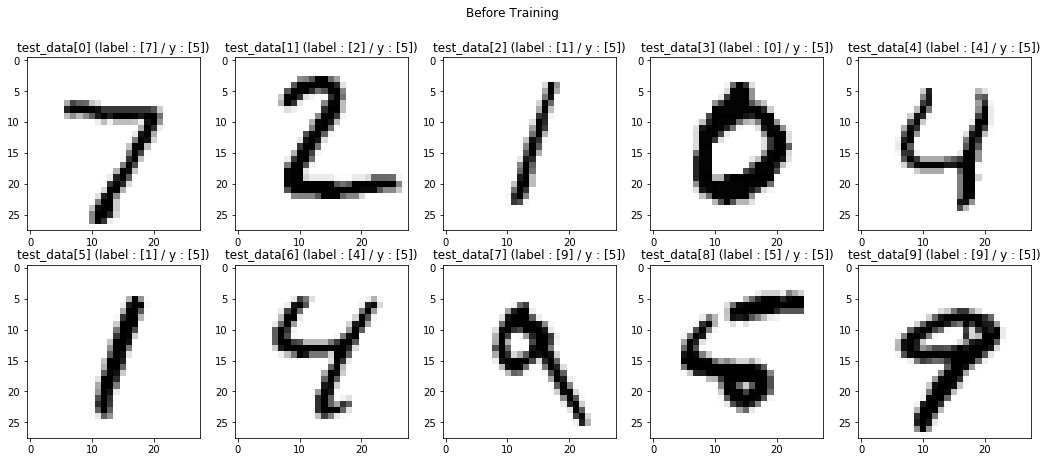

In [17]:
arr_epoch = []
arr_accu = []

# 학습 (Training)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

train_data_idx = np.arange(train_data_size[0])

y_out = sess.run(hypothesis, feed_dict={x_ph: test_data})
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
aidl.Make_Result_Plot("Before Training", test_data, test_labels, y_max)

accu = aidl.Accuracy(y_out,test_labels)
arr_epoch.append(0)
arr_accu.append(accu)

> ### 학습 (Training): updated aidl's modules

In [12]:
%%time
for epoch_idx in range(1, N_epoch+1):
    np.random.shuffle(train_data_idx)
    for batch_idx in range(batch_count):
        batch_data = np.array([train_data[train_data_idx[idx]] for idx in range(batch_size)])
        batch_labels = np.array([train_labels[train_data_idx[idx]] for idx in range(batch_size)])
        sess.run(train, feed_dict={x_ph: batch_data, labels_ph: batch_labels})
    if epoch_idx%1 == 0:
        y_out = sess.run(hypothesis, feed_dict={x_ph: test_data})
        accu = aidl.Accuracy(y_out,test_labels)
        print("[{:>5}] accuracy = {:>10.4}".format(epoch_idx,accu))
        arr_epoch.append(epoch_idx)
        arr_accu.append(accu)

[    1] accuracy =     0.1992
[    2] accuracy =     0.2483
[    3] accuracy =     0.3239
[    4] accuracy =     0.2718
[    5] accuracy =     0.3136
[    6] accuracy =     0.3115
[    7] accuracy =      0.212
[    8] accuracy =     0.2021
[    9] accuracy =     0.3582
[   10] accuracy =     0.4943
[   11] accuracy =     0.1986
[   12] accuracy =     0.3667
[   13] accuracy =     0.2401
[   14] accuracy =     0.4404
[   15] accuracy =      0.462
[   16] accuracy =     0.4199
[   17] accuracy =     0.5378
[   18] accuracy =     0.4417
[   19] accuracy =      0.367
[   20] accuracy =      0.357
[   21] accuracy =     0.4651
[   22] accuracy =     0.4797
[   23] accuracy =      0.458
[   24] accuracy =     0.5248
[   25] accuracy =     0.5073
[   26] accuracy =      0.519
[   27] accuracy =     0.3862
[   28] accuracy =     0.4935
[   29] accuracy =     0.6055
[   30] accuracy =     0.5021
[   31] accuracy =     0.5598
[   32] accuracy =     0.5167
[   33] accuracy =     0.6116
[   34] ac

> ### Ploting : Cost/Training Count

(0, 1.1)

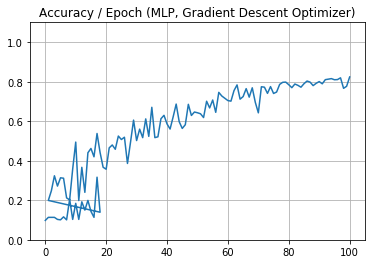

In [13]:
# Plot : Accuracy / Epoch
fig_accu, ax_accu = plt.subplots()
ax_accu.plot(arr_epoch, arr_accu)
ax_accu.set_title("Accuracy / Epoch (MLP, Gradient Descent Optimizer)")
ax_accu.grid(True)
ax_accu.set_ylim(0,1.1)

> ### Training 이후: updated with aidl's modules

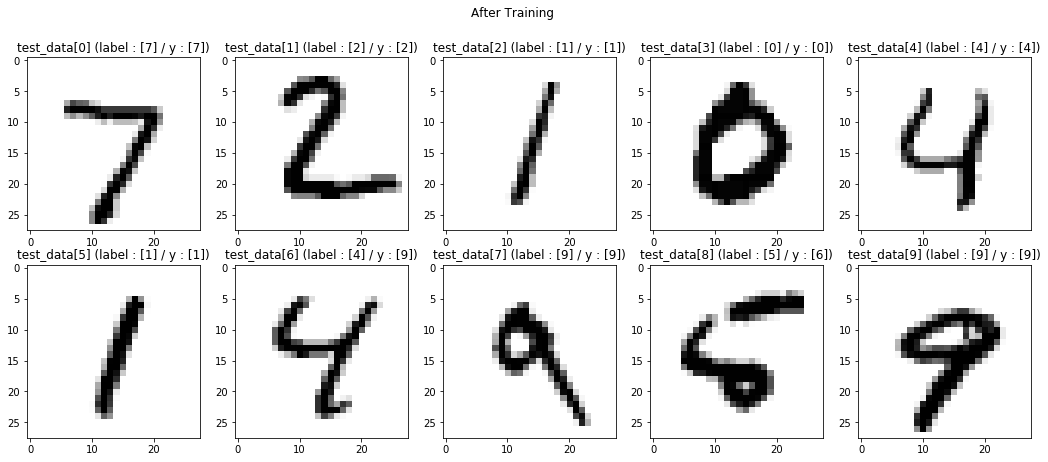

In [14]:
y_out = sess.run(hypothesis, feed_dict={x_ph: test_data})
y_max = np.argmax(y_out, axis=1).reshape((-1, 1))
aidl.Make_Result_Plot("After Training", test_data, test_labels, y_max)

## **실습과제**

### 과제1. 자신의 module을 맏들어 import 해 보자
#### -- "aidlutils.py"를 자신의 working directory로 옮기고 자신의 function을 만든뒤 import 하여 사용하여 보자.
#### -- 어떤 경우에 필요한지 생각해 보자 

In [0]:
#import aidlutils as aidl
# 위에 해놓았음!
